# Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the libraries

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.6.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: grpcio, wrapt, numpy, protobuf, astunparse, flatbuffers, opt-einsum, tensorflow-estimator, gast, keras, google-pasta, h5py, keras-preprocessing, absl-py, clang, typing-extensions, wheel, termcolor, six, tensorboard
Required-by: kapre


In [3]:
!pip show keras

Name: keras
Version: 2.6.0
Summary: TensorFlow Keras.
Home-page: https://keras.io/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow, keras-vis


In [4]:
!pip show matplotlib

Name: matplotlib
Version: 3.2.2
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.7/dist-packages
Requires: kiwisolver, pyparsing, python-dateutil, numpy, cycler
Required-by: yellowbrick, seaborn, scikit-image, pycocotools, plotnine, pandas-profiling, mlxtend, mizani, missingno, matplotlib-venn, keras-vis, imgaug, fbprophet, fastai, descartes, daft, arviz


In [5]:
import os,time
import scipy.io
import scipy.stats
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(tf.__version__)

2.6.0


## Load the mat tables dataset and defining functions for first predicting time, converting mat table to array

In [6]:
PHM_path ='/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat'
PHM_bearing_files = [os.path.join(PHM_path,file) for file in os.listdir(PHM_path)]

# get first predicting time function
def get_First_Predicting_Time(h2):
    kurtosis_list = []
    rms_list = []
    for i,row in enumerate(h2):
        kurt = scipy.stats.kurtosis(row)
        kurtosis_list.append(kurt)
        rms = np.mean(row**2)**0.5
        rms_list.append(rms)
        weight = np.concatenate([np.linspace(5,   4.5, 100),
                                 np.linspace(4.5, 4,   500),
                                 np.linspace(4,   3,   2000),
                                 np.linspace(3,   3,   3000)])
        w = weight[i]
        kurt_c = kurt > np.mean(kurtosis_list)+w*np.std(kurtosis_list)
        rms_c  = rms  > np.mean(rms_list) +w*np.std(rms_list)
        if kurt_c and rms_c:
            break
    return i

# Converting mattables to array
def mat_tables_to_array(file):
    h = scipy.io.loadmat(file)['h'].reshape(-1)
    h2 = h.reshape(-1,2560)
    kurtosis = np.array( [scipy.stats.kurtosis(i) for i in h2] )
    rms = np.array( [np.mean(i**2)**0.5 for i in h2] )
    rms = np.convolve(rms,[0.3,0.4,0.3],mode='same')
    maximum = np.array( [np.max(np.abs(i)) for i in h2] )
    First_Predicting_Time = get_First_Predicting_Time(h2)
    return h,First_Predicting_Time,kurtosis,rms,maximum

In [7]:
PHM_bearing_files[:]

['/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_1.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_2.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing2_1.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing2_2.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing3_1.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing3_2.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_3.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/B

In [8]:
PHM_bearing_files[:5]

['/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_1.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_2.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing2_1.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing2_2.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing3_1.mat']

## Plot the first predicting time

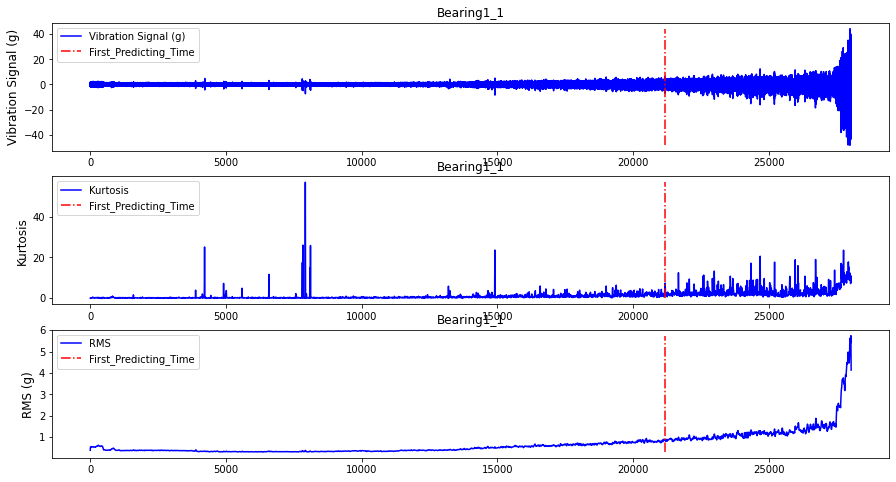

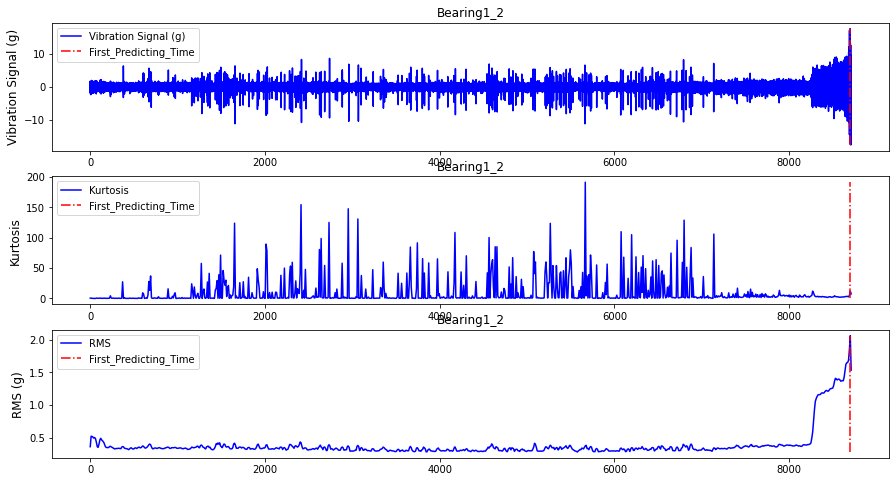

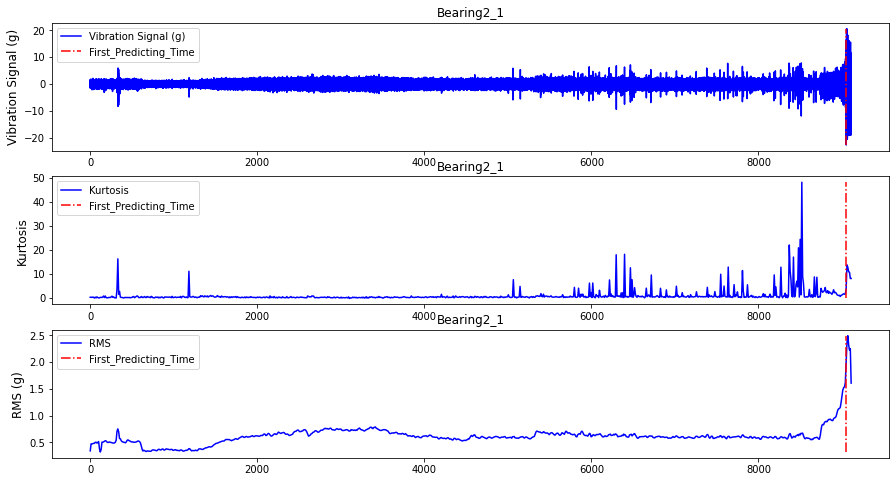

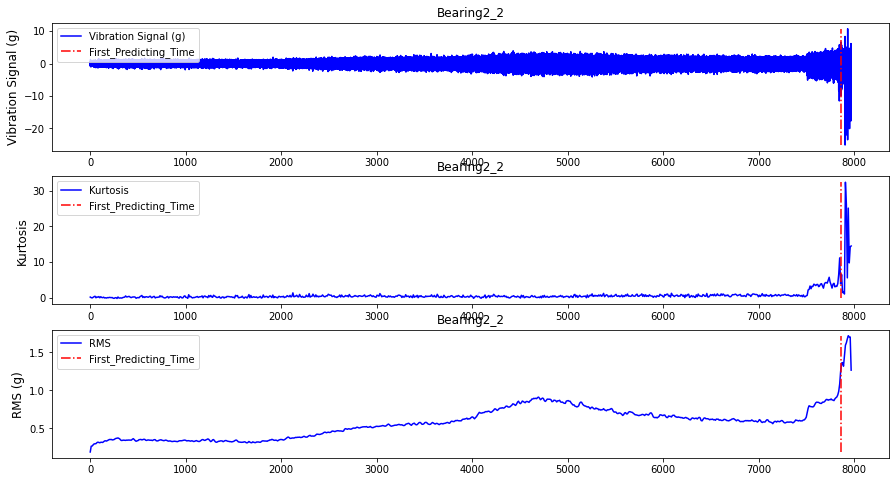

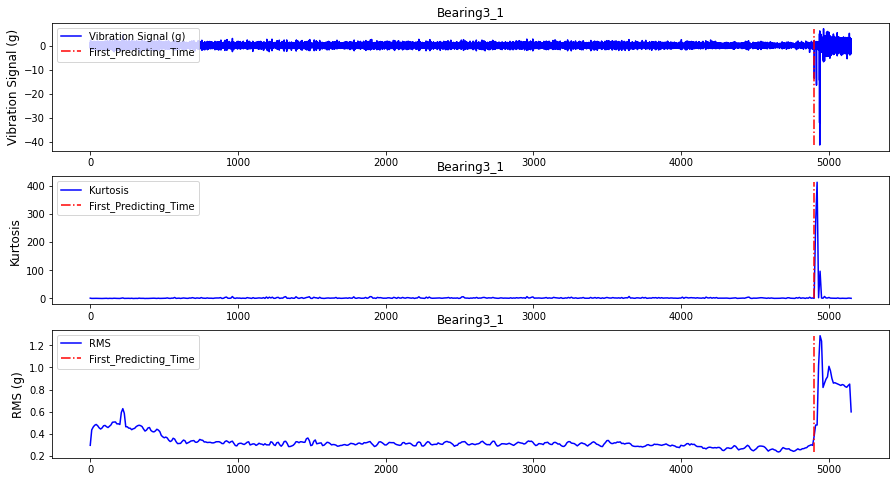

In [9]:
for file in PHM_bearing_files[:5]:

    h,First_Predicting_Time,kurtosis,rms,maximum = mat_tables_to_array(file)
    tlong = np.linspace(0,len(rms)*10,len(h))  # Calculating longest vibration signals
    tshort = np.linspace(0,len(rms)*10,len(rms))  # Calculating shortest vibration signals
    First_Predicting_Time = First_Predicting_Time*10
    
    plt.figure(figsize=(15,8))
    plt.title(file[-14:-4])
    
    plt.subplot(311)
    plt.plot(tlong,h,'b',label='Vibration Signal (g)')
    plt.plot([First_Predicting_Time,First_Predicting_Time],[min(h),max(h)],'r-.',label='First_Predicting_Time')

    plt.yticks(size = 10)
    plt.xticks(size = 10)
    plt.title(file[-14:-4])
    # plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Vibration Signal (g)', fontsize=12)
    plt.legend(loc='upper left')
    
    plt.subplot(312)
    plt.plot(tshort,kurtosis,'b',label='Kurtosis')
    plt.plot([First_Predicting_Time,First_Predicting_Time],[min(kurtosis),max(kurtosis)],'r-.',label='First_Predicting_Time')

    plt.yticks(size = 10)
    plt.xticks(size = 10)
    plt.title(file[-14:-4])
    # plt.xlabel('Time (s)',  fontsize=12)
    plt.ylabel('Kurtosis',  fontsize=12)
    plt.legend(loc='upper left')
    
    plt.subplot(313)
    plt.plot(tshort,rms,'b',label='RMS')
    plt.plot([First_Predicting_Time,First_Predicting_Time],[min(rms),max(rms)],'r-.',label='First_Predicting_Time')

    plt.yticks(size = 10)
    plt.xticks(size = 10)
    plt.title(file[-14:-4])
    # plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('RMS (g)', fontsize=12)
    plt.legend(loc='upper left')
    
    
    # plt.subplot(414)
    # plt.plot(tshort,maximum,label='Max')
    # plt.plot([First_Predicting_Time,First_Predicting_Time],[min(maximum),max(maximum)],'r-.',label='First_Predicting_Time')
    # plt.xlabel('Time (s)', fontsize=12)
    # plt.ylabel('Max (g)', fontsize=12)
    # plt.legend(loc='upper left')
    
    # plt.savefig('./First_Predicting_Time_Selection/'+file[-14:-4]+'_First_Predicting_Time_Selection',dpi=200)
    plt.show()

In [10]:
# h,First_Predicting_Time,kurtosis,rms,maximum = mat_tables_to_array(PHM_bearing_files[3]) # 1-4
# tlong = np.linspace(0,len(rms)*10,len(h)) # Calculating longest vibration signals
# # print(tlong)
# tshort = np.linspace(0,len(rms)*10,len(rms))  # Calculating shortest vibration signals
# # print(tshort)
# First_Predicting_Time = First_Predicting_Time*10

# plt.figure(figsize=(10,8))
# plt.subplot(211)
# plt.plot(tlong,h,'b',label='Vibration Signal (g)')
# plt.plot([First_Predicting_Time,First_Predicting_Time],[-60,60],'r--',lw=2,label='First_Predicting_Time')
# plt.legend(loc='upper right')
# plt.ylim(-50,50)
# plt.xlabel('Time (s)',fontsize=15)
# plt.ylabel('Amplitude (g)',fontsize=15)
# plt.yticks(size = 14)
# plt.xticks(size = 14)

# plt.subplot(212)
# plt.plot(tshort,rms,'b',label='RMS')
# plt.plot([First_Predicting_Time,First_Predicting_Time],[-5,15],'r--',lw=2,label='First_Predicting_Time')
# plt.plot([3]*len(maximum)*10,'g--',label='Failure threshold')
# plt.legend(loc='upper right')
# plt.ylim(-2,12)
# plt.xlabel('Time (s)',fontsize=15)
# plt.ylabel('RMS (g)',fontsize=15)
# plt.yticks(size = 14)
# plt.xticks(size = 14)
# plt.savefig(fname='two_stage_rms', dpi=300,)
# plt.show()  

## Generating the test bearing files data

In [11]:
test_bearing = ['1_1','1_3','1_4'] #test bearings dataset

test_bearing_files = []
for f in PHM_bearing_files:
    if f[-7:-4] in test_bearing:
        test_bearing_files.append(f)
test_bearing_files

['/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_1.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_3.mat',
 '/content/drive/MyDrive/Predictive_Maintenance/PHM-RUL-Prediction-by-EM-main/original_data/femto_dataset/mat/Bearing1_4.mat']

## Function to get features from first predicting time

In [12]:
def get_feature_First_Predicting_Time(bearing_files):
    feature_list = []
    First_Predicting_Time_list = []
    for i,file in enumerate(bearing_files):
        h,First_Predicting_Time,kurtosis,rms,maximum = mat_tables_to_array(file)
        h2 = h.reshape(-1,2560)        
        feature= np.concatenate(  [   rms[:].reshape(-1,1),
                                       maximum[:].reshape(-1,1),         ],  axis=1)
        print(file[-14:-4], h2.shape, feature.shape,First_Predicting_Time, sep='\t')
        feature_list.append(feature)
        First_Predicting_Time_list.append(First_Predicting_Time)

    return feature_list,First_Predicting_Time_list

'''
Bearing1_1	(2803, 2560)	(2803, 2)	2117	2766
Bearing1_3	(2375, 2560)	(2375, 2)	1681	2325
Bearing1_4	(1428, 2560)	(1428, 2)	1085	1140'''
feature_list,First_Predicting_Time_list = get_feature_First_Predicting_Time(test_bearing_files)
len(feature_list), feature_list[0].shape

Bearing1_1	(2803, 2560)	(2803, 2)	2117
Bearing1_3	(2375, 2560)	(2375, 2)	1681
Bearing1_4	(1428, 2560)	(1428, 2)	1085


(3, (2803, 2))

In [13]:
First_Predicting_Time_list = [1463,1644,1091]
Failure_Threshold_list = [2763,2287,1139]

print("First_Predicting_Time List = ", First_Predicting_Time_list)
print("Failure Threshold List = ", Failure_Threshold_list)

First_Predicting_Time List =  [1463, 1644, 1091]
Failure Threshold List =  [2763, 2287, 1139]


# Model

In [14]:
class EModel(tf.Module):
    def __init__(self,init=[1.0,0.005,0.0,0.0],**kwargs):
        super().__init__(**kwargs)
        # inita = 1.0
        # initb = 0.005
        # initc = 0.0
        # initd = 0.0
        inita = tf.constant(init[0],dtype=tf.float32)
        # print('inita',inita)
        initb = tf.constant(init[1],dtype=tf.float32)
        # print('initb',initb)
        initc = tf.constant(init[2],dtype=tf.float32)
        # print('initc',initc)
        initd = tf.constant(init[3],dtype=tf.float32)
        # print('initd',initd)
        
        self.a = tf.Variable(tf.math.log(inita), name='a',dtype=tf.float32)
        self.b = tf.Variable(tf.math.log(initb), name='b',dtype=tf.float32)
        self.c = tf.Variable(initc, name='c',dtype=tf.float32)
        self.d = tf.Variable(initd, name='d',dtype=tf.float32)
        # print('Init:',self.__call__(100.0).numpy(),self.a.numpy(),tf.exp(self.a).numpy())
        
        
        
    def __call__(self, x):
        x = tf.cast(x,dtype=tf.float32)
        a,b,c,d = self.a, self.b, self.c, self.d
        a = tf.exp(a)
        b = tf.exp(b)+0.0005
        # c = tf.exp(c)
        # d = tf.exp(d)
        y = a*tf.exp(b*x+d) +c

        return y
# init_model = EModel()
# zz = np.linspace(-200,1000,1000)
# plt.figure(figsize=(10,3))
# plt.plot(zz, init_model(zz))
# plt.xlim(-200,1000)
# plt.ylim(-1,10)
# plt.grid()

## Function for plotting the predicted curve

In [15]:
def plot_predict_curve(init_model,trained_model,history_time,history_data,all_time,all_data,ckpt,
                       thd,predict_FT=None,fn=None,xlim=None,):
    plt.figure(figsize=(10,6))
    plt.scatter(all_time*10, all_data, c="c", label='After checkpoint')
    plt.scatter(history_time*10, history_data, c="b", label='Before checkpoint')
    
    # First_Predicting_Time,FT,Failure threshold
    plt.plot([First_Predicting_Time*10,First_Predicting_Time*10],[0,10],'g--',label='FPT')
    plt.legend(loc='upper right')
    
    plt.plot([Failure_Threshold*10,Failure_Threshold*10],[0,10],'k--',label='FT')
    plt.legend(loc='upper right')

    if predict_FT is not None:
        plt.legend(loc='upper right')
        plt.plot([thd]*5000*10,'k',label='Failure threshold')
        plt.legend(loc='upper right')
        plt.plot([predict_FT*10,predict_FT*10],[0,10],'y',label='Predicted FT')
    else:
        plt.legend(loc='upper right')
        plt.plot([thd]*5000*10,'k',label='Failure threshold')

    
    t = np.arange(-1000,2000) 
    t2 = (t + First_Predicting_Time)*10  
    plt.plot(t2, init_model(t),    "m--", linewidth=3, label='Prediction before training')
    if trained_model is not None:
        plt.plot(t2, trained_model(t), "r--", linewidth=3, label='Prediction after training')
    
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('RMS (g)',fontsize=20)
    plt.yticks(size = 20)
    plt.xticks(rotation =30,size = 20)
    plt.legend(loc='upper right')

    if xlim is not None:
        plt.xlim(xlim)
    plt.ylim(0,5)
    
    plt.legend(loc='upper right')
    if fn is not None:
        plt.savefig(fname=fn, dpi=300,)
    plt.show()
    
# Function to initialize the model    
def get_init_model(data):
    st = np.min(data)
    k = 1000 if len(data)>1000 else 5
    en = np.mean(data[-k:])
    a = 0.5
    c = st-a 
    b = np.log((en-c)/a)/len(data)
    print('Value of b =',b)
    d = 0.0
    init = [a,b,c,d]
    model = EModel(init) 
    return model

# Defining the threshold
threshold = [1.6,1.5,3.0]

## Plots for first predicting time, failure threshold, checkpoints

Maximum RUL =  646
Checkpoint =  2756
Value of b = 0.0022761245654440935


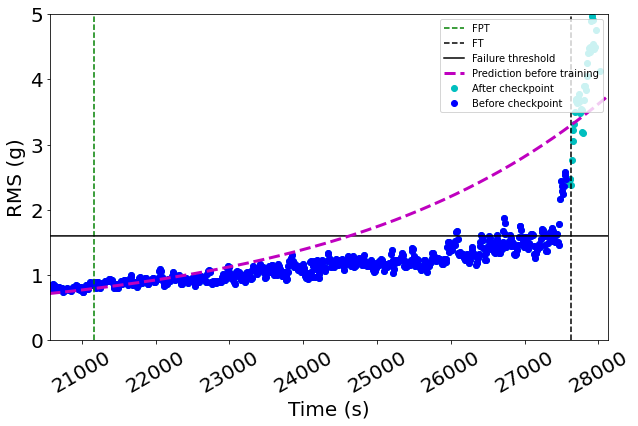

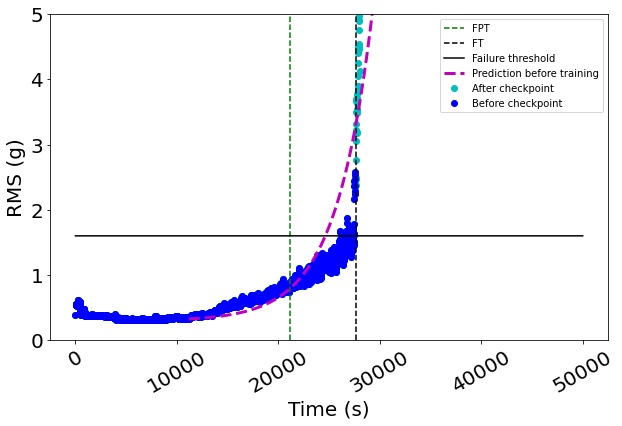

Maximum RUL =  643
Checkpoint =  2280
Value of b = 0.0020858837094476666


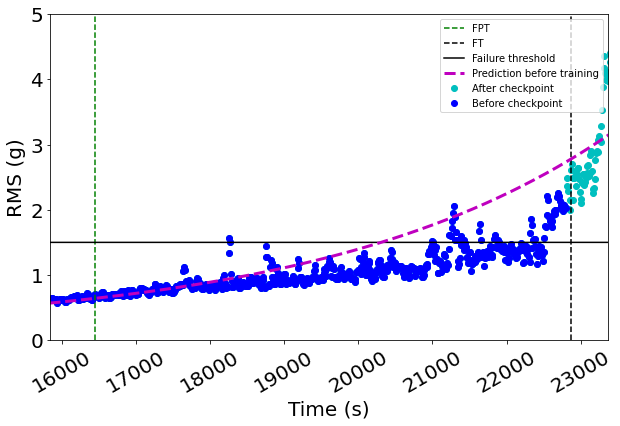

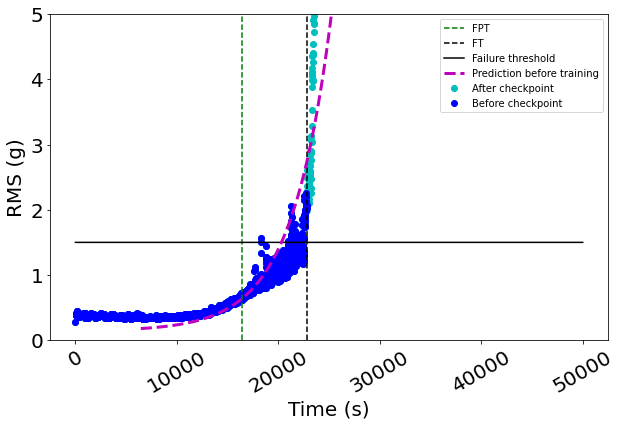

Maximum RUL =  48
Checkpoint =  1138
Value of b = 0.028941229184786935


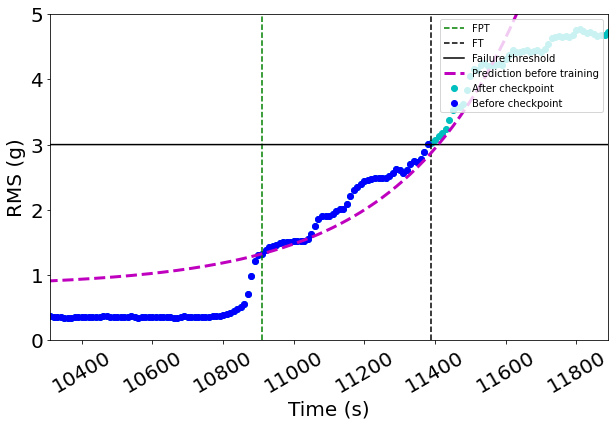

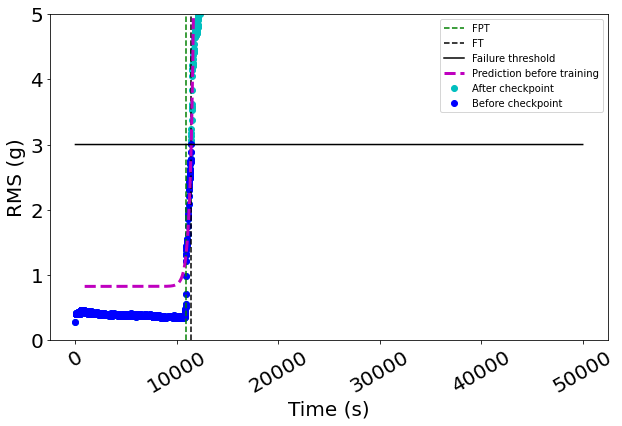

In [16]:
for n in range(3):
    data  = feature_list[n][:,0]

    First_Predicting_Time = First_Predicting_Time_list[n]
    Failure_Threshold = Failure_Threshold_list[n]
    thd = threshold[n]
    if n==0: First_Predicting_Time=2117

    # Calculations for maximum RUL, checkpoint
    max_RUL = Failure_Threshold - First_Predicting_Time
    print("Maximum RUL = ", max_RUL)
    checkpoint = First_Predicting_Time + int(max_RUL*0.99)
    # checkpoint = First_Predicting_Time+1
    print("Checkpoint = ",checkpoint)
    # Loading historical data along with the time
    history_data = data[:checkpoint+1]
    history_time = np.arange(len(history_data))

    # Loading all the data and all time
    all_data = data
    all_time = np.arange(len(all_data))
    
    # Initialize the model for the history data
    init_model = get_init_model(history_data[First_Predicting_Time:])

    # Call the plot predict curve
    plot_predict_curve(init_model,None,history_time,history_data,all_time,all_data,ckpt=checkpoint,
                       thd=thd,fn=None,xlim=[10*(First_Predicting_Time-60),10*(Failure_Threshold+50)])    
    plot_predict_curve(init_model,None,history_time,history_data,all_time,all_data,ckpt=checkpoint,
                       thd=thd,fn=None,xlim=None) 

In [17]:
# Loss function
def loss(y_true, y_pred):
    w = np.linspace(0.5,2.0,len(y_true))
    # w = np.exp(w)
    weight = w * y_true
    # mse = tf.keras.losses.mse(y_true,y_pred) # mean squared error
    se = tf.square(y_true - y_pred)  # square error
    se = se * weight
    mse = tf.reduce_mean(se)
    return mse

# Train step
def train_step(model, x_true,y_true):
    lr = 5e-5
    opt = tf.keras.optimizers.Adam(lr)  # Using Adam optimizer
    with tf.GradientTape() as gt:
        y_pred  = model(x_true)
        current_train_step_loss = loss(y_true, y_pred) # Loss function for the current training step
    gradients = gt.gradient(current_train_step_loss, model.trainable_variables)  # calculation of the gradients
    opt.apply_gradients(zip(gradients, model.trainable_variables))  # Applying the gradients on the trained model
    return current_train_step_loss

# Training the model
def train_model(history_data):
    y_true = history_data[First_Predicting_Time:] # y_true value for the history_data
    x_true = np.arange(len(y_true)) # x_true value 
    print("train_model_entrance_history_data.shape=%d,  y_true.shape=%d,  x_true[0]=%d, x_true[-1]=%d" %
                  (len(history_data),len(y_true),x_true[0],x_true[-1]))

    model  = get_init_model(y_true)
    aa,bb,cc,dd,losses =[], [], [], [], []
    for step in range(10000):
        train_step(model, x_true,y_true )
        aa.append(model.a.numpy())
        bb.append(model.b.numpy())
        cc.append(model.c.numpy())
        dd.append(model.d.numpy())
        y_pred = model(x_true)
        losses.append(loss(y_true, y_pred).numpy())
        
        if step%100==0:
            print("step  %3d: a=%1.8f    b=%1.8f    c=%1.8f    d=%1.8f,   loss=%2.8f" %
                  (step, aa[-1], bb[-1], cc[-1], dd[-1], losses[-1]))
            print("step  %3d: a=%1.8f    b=%1.8f    c=%1.8f    d=%1.8f,   loss=%2.8f \n" %
                  (step, np.exp(aa[-1]), np.exp(bb[-1]), np.exp(cc[-1]), np.exp(dd[-1]), losses[-1]))
        min_step = 50 
        max_step = 200
        if step>max_step or step>=min_step and max(losses[-20:-1] )<=0.2:
            break
        log = np.stack([aa,bb,cc,dd,losses] )
    return get_init_model(y_true),model, log

# Calling the train model function
init_model,trained_model,train_log = train_model(history_data) 

train_model_entrance_history_data.shape=1139,  y_true.shape=48,  x_true[0]=0, x_true[-1]=47
Value of b = 0.028941229184786935
step    0: a=-0.69309717    b=-3.54243803    c=0.82515562    d=0.00005000,   loss=0.17810316
step    0: a=0.50002497    b=0.02894268    c=2.28223586    d=1.00004995,   loss=0.17810316 

Value of b = 0.028941229184786935


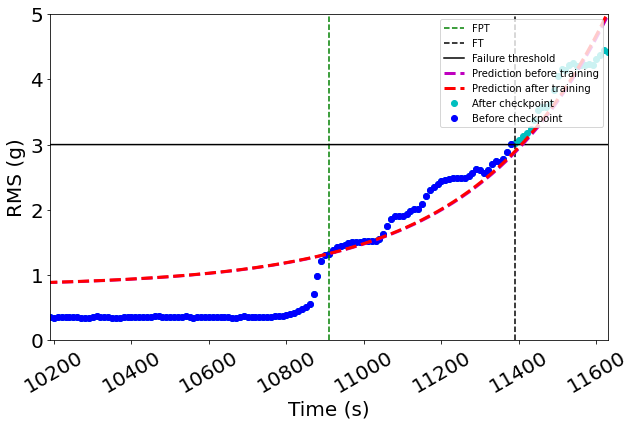

In [18]:
# Calling plot and predict curve
plot_predict_curve(init_model,trained_model,history_time,history_data,all_time,all_data,ckpt=checkpoint,
                   thd=thd,fn='train_process',xlim=[(First_Predicting_Time-int((Failure_Threshold-First_Predicting_Time)*1.5))*10,(Failure_Threshold+int((Failure_Threshold-First_Predicting_Time)*0.5))*10])

# Function to display and save the results
def show_and_save(data,index=None,xlabel='x-axis',ylabel='y-axis',filename=None,ylim=None):
    plt.figure(figsize=(4,2))
    if index is None: index = np.arange(len(data))
    plt.plot(index,data)
    plt.yticks(np.array(np.linspace(min(data)*10000, max(data)*10000, 2),dtype=np.int)/10000)
    plt.yticks( size = 20)
    plt.xticks( size = 20)

    if ylim is not None: plt.ylim(ylim)
    plt.savefig(fname=filename + '.png', dpi=150,)
    plt.show()

# show_and_save(data=train_log[0],xlabel='Step',ylabel='a',filename='a',ylim=None)
# show_and_save(data=train_log[1],xlabel='Step',ylabel='b',filename='b',ylim=None)
# show_and_save(data=train_log[2],xlabel='Step',ylabel='c',filename='c')
# show_and_save(data=train_log[3],xlabel='Step',ylabel='d',filename='d')
# show_and_save(data=train_log[4],xlabel='Step',ylabel='Loss',filename='loss')

Predict Failure Threshold =  1141


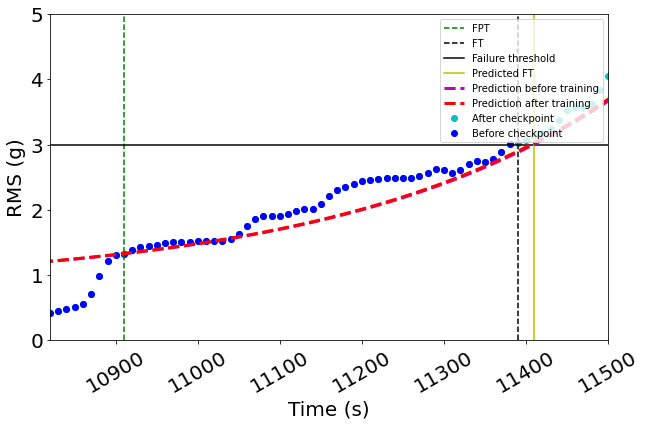

In [19]:
# Function to obtain predicted value of Failure Threshold
def get_predict_FT(history_data,trained_model,ckpt,threshold):
   
    t = ckpt-First_Predicting_Time
    predictd_rms = trained_model(t).numpy()
    while predictd_rms<threshold:
        t = t+1
        predictd_rms = trained_model(t).numpy()
    t = t
    Failure_Threshold = t + First_Predicting_Time
    if Failure_Threshold<1 : Failure_Threshold=1
    return Failure_Threshold
        
predict_FT = get_predict_FT(history_data, trained_model,checkpoint,threshold=thd)
print("Predict Failure Threshold = ", predict_FT)

plot_predict_curve(init_model,trained_model,history_time,history_data,all_time,all_data,ckpt=checkpoint,thd=thd,
                   predict_FT=predict_FT,fn='bearing1_3_RUL',

                   xlim=[(First_Predicting_Time-int((Failure_Threshold-First_Predicting_Time)*0.2))*10,(max(Failure_Threshold,predict_FT)+int((Failure_Threshold-First_Predicting_Time)*0.2))*10])

In [20]:
def add_zero(num):
    s = str(num)
    for i in range(4-len(s)):
        s = '0'+s

    return s

Checking Point-First_Predicting_Time 1.821166368972539
n,  m,  checkpoint,  First_Predicting_Time,  FT,  d
0  1  1593  1463  2763  130
1 0 history_data.shape (1594,)
train_model_entrance_history_data.shape=1594,  y_true.shape=131,  x_true[0]=0, x_true[-1]=130
Value of b = 0.0012010424579955113
step    0: a=-0.69319719    b=-6.72461557    c=-0.01826054    d=-0.00004999,   loss=0.00054428
step    0: a=0.49997500    b=0.00120098    c=0.98190510    d=0.99994999,   loss=0.00054428 

Value of b = 0.0012010424579955113
******************
 True RUL =  1170
 Predicted RUL =  566
n,  m,  checkpoint,  First_Predicting_Time,  FT,  d
0  2  1723  1463  2763  130
2 0 history_data.shape (1724,)
train_model_entrance_history_data.shape=1724,  y_true.shape=261,  x_true[0]=0, x_true[-1]=260
Value of b = 0.0008445908526962414
step    0: a=-0.69319719    b=-7.07670832    c=-0.01826055    d=-0.00005000,   loss=0.00180466
step    0: a=0.49997500    b=0.00084455    c=0.98190510    d=0.99994999,   loss=0.001804

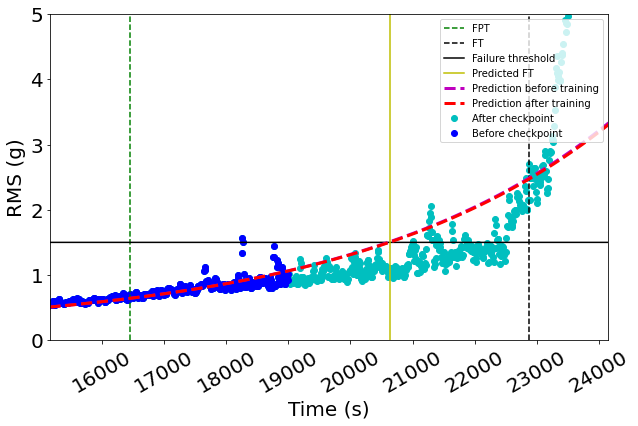

n,  m,  checkpoint,  First_Predicting_Time,  FT,  d
1  5  1964  1644  2287  64
5 1 history_data.shape (1965,)
train_model_entrance_history_data.shape=1965,  y_true.shape=321,  x_true[0]=0, x_true[-1]=320
Value of b = 0.002099155353809057
step    0: a=-0.69319719    b=-6.16627026    c=0.14086995    d=-0.00005000,   loss=0.03536366
step    0: a=0.49997500    b=0.00209905    c=1.15127492    d=0.99994999,   loss=0.03536366 

Value of b = 0.002099155353809057
******************
 True RUL =  323
 Predicted RUL =  69
n,  m,  checkpoint,  First_Predicting_Time,  FT,  d
1  6  2028  1644  2287  64
6 1 history_data.shape (2029,)
train_model_entrance_history_data.shape=2029,  y_true.shape=385,  x_true[0]=0, x_true[-1]=384
Value of b = 0.0018071665201145218
step    0: a=-0.69319719    b=-6.31604528    c=0.14086995    d=-0.00005000,   loss=0.03607360
step    0: a=0.49997500    b=0.00180708    c=1.15127492    d=0.99994999,   loss=0.03607360 

Value of b = 0.0018071665201145218
******************
 Tru

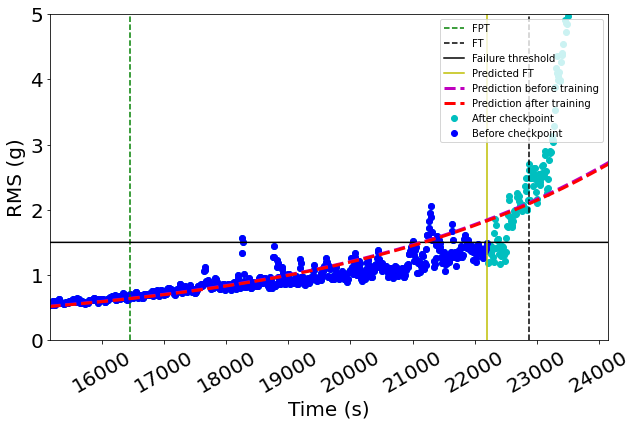

n,  m,  checkpoint,  First_Predicting_Time,  FT,  d
1  10  2284  1644  2287  64
10 1 history_data.shape (2285,)
train_model_entrance_history_data.shape=2285,  y_true.shape=641,  x_true[0]=0, x_true[-1]=640
Value of b = 0.0022363081744160352
step    0: a=-0.69319719    b=-6.10297918    c=0.14086993    d=-0.00005000,   loss=0.79404789
step    0: a=0.49997500    b=0.00223620    c=1.15127480    d=0.99994999,   loss=0.79404789 

step  100: a=-0.69819802    b=-6.10798597    c=0.13586910    d=-0.00505015,   loss=0.72465891
step  100: a=0.49748093    b=0.00222503    c=1.14553201    d=0.99496257,   loss=0.72465891 

step  200: a=-0.70319885    b=-6.11299276    c=0.13086827    d=-0.01005030,   loss=0.65982348
step  200: a=0.49499932    b=0.00221392    c=1.13981771    d=0.99000007,   loss=0.65982348 

Value of b = 0.0022363081744160352
******************
 True RUL =  3
 Predicted RUL =  0
Checking Point-First_Predicting_Time 1.701379888839041
n,  m,  checkpoint,  First_Predicting_Time,  FT,  d
2 

In [21]:
all_predicted_FT_list = []   
for n in range(len(feature_list)):
    data  = feature_list[n][:,0]
    First_Predicting_Time = First_Predicting_Time_list[n]
    Failure_Threshold = Failure_Threshold_list[n]
    thd=threshold[n]
    print('Checking Point-First_Predicting_Time',data[Failure_Threshold]-data[First_Predicting_Time])
    
    d = (Failure_Threshold - First_Predicting_Time)//10
    predictd_FT_list = []  
    for m in range(1,11):
        checkpoint = First_Predicting_Time + m*d
        if checkpoint==Failure_Threshold: break
        print('n,  m,  checkpoint,  First_Predicting_Time,  FT,  d')
        print(n,m,checkpoint,First_Predicting_Time,Failure_Threshold,d,sep='  ')
        history_data = data[:checkpoint+1]  
        history_time = np.arange(len(history_data))
        all_data = data
        all_time = np.arange(len(all_data))
        print(m,n,'history_data.shape',history_data.shape)
        init_model,trained_model,train_log = train_model(history_data)
        predict_FT = get_predict_FT(history_data, trained_model, ckpt = checkpoint,threshold=thd)
        print('******************')
        t_RUL = Failure_Threshold-checkpoint
        print(" True RUL = ", t_RUL)
        p_RUL = predict_FT-checkpoint
        print(" Predicted RUL = ", p_RUL)
        predictd_FT_list.append([checkpoint,t_RUL,p_RUL,])
        if checkpoint%20==0:
            plot_predict_curve(init_model,trained_model,history_time,history_data,all_time,all_data,
                               ckpt=checkpoint,thd=thd,predict_FT=predict_FT,
                               fn='./bearing1_3_RUL'+add_zero(n)+'_'+add_zero(m)
                                  +'_'+add_zero(checkpoint)+'_'+add_zero(t_RUL)+'_'+add_zero(p_RUL),
                               xlim=[(First_Predicting_Time-int((Failure_Threshold-First_Predicting_Time)*0.2))*10,(max(Failure_Threshold,predict_FT)+int((Failure_Threshold-First_Predicting_Time)*0.2))*10])
        
    all_predicted_FT_list.append(predictd_FT_list)

In [22]:
all_predicted_FT_list

[[[1593, 1170, 566],
  [1723, 1040, 620],
  [1853, 910, 524],
  [1983, 780, 376],
  [2113, 650, 228],
  [2243, 520, 112],
  [2373, 390, 2],
  [2503, 260, 171],
  [2633, 130, 0]],
 [[1708, 579, 156],
  [1772, 515, 139],
  [1836, 451, 207],
  [1900, 387, 163],
  [1964, 323, 69],
  [2028, 259, 54],
  [2092, 195, 75],
  [2156, 131, 20],
  [2220, 67, 0],
  [2284, 3, 0]],
 [[1095, 44, 44],
  [1099, 40, 37],
  [1103, 36, 45],
  [1107, 32, 32],
  [1111, 28, 20],
  [1115, 24, 18],
  [1119, 20, 12],
  [1123, 16, 9],
  [1127, 12, 9],
  [1131, 8, 7]]]

In [23]:
x = np.array(all_predicted_FT_list[0][:])
print(x.shape)
for i in range(len(x)):
    t = x[i][1]
    p = x[i][2]
    print(i,t,p,1-abs(t-p)/t)
    print()

(9, 3)
0 1170 566 0.4837606837606837

1 1040 620 0.5961538461538461

2 910 524 0.5758241758241758

3 780 376 0.482051282051282

4 650 228 0.3507692307692307

5 520 112 0.2153846153846154

6 390 2 0.00512820512820511

7 260 171 0.6576923076923077

8 130 0 0.0



In [24]:
result = np.array(all_predicted_FT_list)
print(result)

[list([[1593, 1170, 566], [1723, 1040, 620], [1853, 910, 524], [1983, 780, 376], [2113, 650, 228], [2243, 520, 112], [2373, 390, 2], [2503, 260, 171], [2633, 130, 0]])
 list([[1708, 579, 156], [1772, 515, 139], [1836, 451, 207], [1900, 387, 163], [1964, 323, 69], [2028, 259, 54], [2092, 195, 75], [2156, 131, 20], [2220, 67, 0], [2284, 3, 0]])
 list([[1095, 44, 44], [1099, 40, 37], [1103, 36, 45], [1107, 32, 32], [1111, 28, 20], [1115, 24, 18], [1119, 20, 12], [1123, 16, 9], [1127, 12, 9], [1131, 8, 7]])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [25]:
# np.save('result',result)

In [26]:
s = np.array(all_predicted_FT_list[0])
s.shape,s[2].shape

((9, 3), (3,))

In [27]:
def CRA(true,pred):
    K = len(true)
    w = np.arange(1,K+1)
    w = w / sum(w)
    RA = 1 - np.abs(true-pred)/(true+1e-6)
    CRA = np.sum(w * RA)
    plt.figure()
    plt.plot(RA)
    plt.ylim(-0.5,1.5)
    
    return CRA,np.mean(RA)#,RA[::100]

 Checkpoint =  [1593 1723 1853 1983 2113 2243 2373 2503 2633]
 Predicted RUL =  [1170 1040  910  780  650  520  390  260  130]
 True RUL =  [566 620 524 376 228 112   2 171   0]
 Predicted RMS =  [2763 2763 2763 2763 2763 2763 2763 2763 2763]
 True RMS =  [2159 2343 2377 2359 2341 2355 2375 2674 2633]
 Checkpoint =  [1708 1772 1836 1900 1964 2028 2092 2156 2220 2284]
 Predicted RUL =  [579 515 451 387 323 259 195 131  67   3]
 True RUL =  [156 139 207 163  69  54  75  20   0   0]
 Predicted RMS =  [2287 2287 2287 2287 2287 2287 2287 2287 2287 2287]
 True RMS =  [1864 1911 2043 2063 2033 2082 2167 2176 2220 2284]
 Checkpoint =  [1095 1099 1103 1107 1111 1115 1119 1123 1127 1131]
 Predicted RUL =  [44 40 36 32 28 24 20 16 12  8]
 True RUL =  [44 37 45 32 20 18 12  9  9  7]
 Predicted RMS =  [1139 1139 1139 1139 1139 1139 1139 1139 1139 1139]
 True RMS =  [1139 1136 1148 1139 1131 1133 1131 1132 1136 1138]


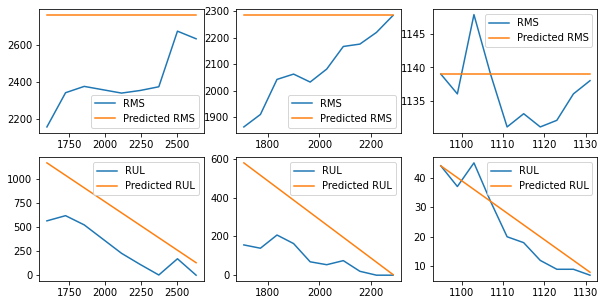

In [28]:
plt.figure(figsize=(10,5))

for i in range(3):
    x = np.array(all_predicted_FT_list[i])
    FT = Failure_Threshold_list[i]
    # ck + pred + true
    ckpt = x[:,0]
    print(" Checkpoint = ",ckpt)
    predrul = x[:,1]
    print (" Predicted RUL = ", predrul)
    truerul = x[:,2]
    print( " True RUL = ", truerul)
    
    predrms = ckpt + predrul
    print(" Predicted RMS = ",predrms)
    truerms = ckpt + truerul
    print(" True RMS = ", truerms)
    
    plt.subplot(2,3,i+1)
    plt.plot(ckpt,truerms,label='RMS')
    plt.plot(ckpt,predrms,label='Predicted RMS')
    plt.legend(loc='best')
    
    plt.subplot(2,3,i+3+1)
    plt.plot(ckpt,truerul,label='RUL')
    plt.plot(ckpt,predrul,label='Predicted RUL')
    plt.legend(loc='upper right')
    
plt.show()

 Checkpoint =  [1593 1723 1853 1983 2113 2243 2373 2503 2633]
 Predicted RUL =  [1170 1040  910  780  650  520  390  260  130]
 True RUL =  [566 620 524 376 228 112   2 171   0]
 Predicted RMS =  [2763 2763 2763 2763 2763 2763 2763 2763 2763]
 True RMS =  [2159 2343 2377 2359 2341 2355 2375 2674 2633]


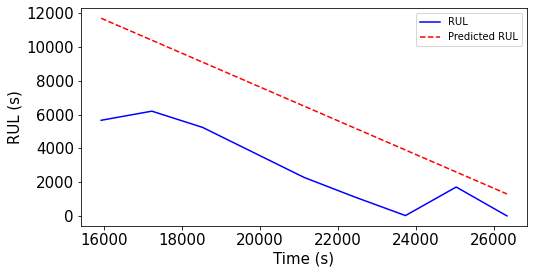

 Checkpoint =  [1708 1772 1836 1900 1964 2028 2092 2156 2220 2284]
 Predicted RUL =  [579 515 451 387 323 259 195 131  67   3]
 True RUL =  [156 139 207 163  69  54  75  20   0   0]
 Predicted RMS =  [2287 2287 2287 2287 2287 2287 2287 2287 2287 2287]
 True RMS =  [1864 1911 2043 2063 2033 2082 2167 2176 2220 2284]


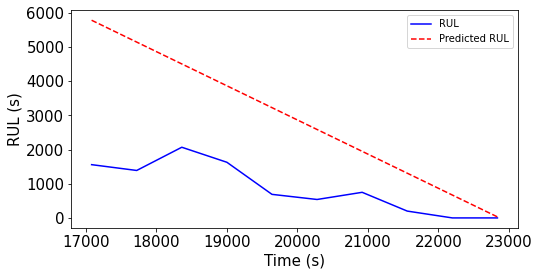

 Checkpoint =  [1095 1099 1103 1107 1111 1115 1119 1123 1127 1131]
 Predicted RUL =  [44 40 36 32 28 24 20 16 12  8]
 True RUL =  [44 37 45 32 20 18 12  9  9  7]
 Predicted RMS =  [1139 1139 1139 1139 1139 1139 1139 1139 1139 1139]
 True RMS =  [1139 1136 1148 1139 1131 1133 1131 1132 1136 1138]


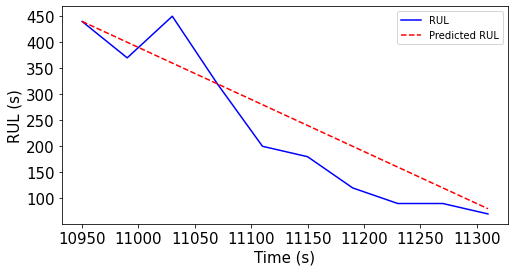

In [29]:
for i in range(3):
    x = np.array(all_predicted_FT_list[i])
    Failure_Threshold = Failure_Threshold_list[i]
    # ck + pred + true
    ckpt = x[:,0] #checkpoint
    print(" Checkpoint = ",ckpt)
    predrul = x[:,1]
    print(" Predicted RUL = ", predrul)
    truerul = x[:,2]
    print(" True RUL = ", truerul)

    predrms = ckpt + predrul
    print(" Predicted RMS = ", predrms)
    truerms = ckpt + truerul
    print(" True RMS = ", truerms)

    plt.figure(figsize=(8,4))
    plt.plot(ckpt*10,truerul*10,'b',label='RUL')
    plt.plot(ckpt*10,predrul*10,'r--',label='Predicted RUL')
    plt.legend(loc='upper left')

    plt.yticks(size = 15)
    plt.xticks(size = 15)
    plt.xlabel('Time (s)', fontsize=15)
    plt.ylabel('RUL (s)', fontsize=15)
    plt.legend(loc='upper right')
    plt.savefig(fname='RUL927prul_' + str(i), dpi=200,)
    plt.show()